# Analysis of number of quotes per topic and newspaper for all years of data

In [ ]:
from google.colab import drive
drive._mount('/content/drive')

In [ ]:
!pip install pandas==1.0.5

In [ ]:
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np
import bz2
import json
from urllib.parse import urlparse
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import os
import glob
import pickle

## Create Dataframe for each journal 


In [2]:
# Function that reads the data sorted as pickle and stores all in a DataFrame
# for the input given years

def read_yearly(year):
    PATH = '/content/drive/MyDrive/ADA_2021/Fox_NY_' + str(year) + '/'
    nb = 1
    df2 = []
    dirs = glob.glob(os.path.join(PATH, "*.pkl"))
    
    for files in dirs:
        df1 = pd.read_pickle(PATH + str(nb)+ '_' + str(year) + '_' + 'FoxNYtimes.pkl')
        df2.append(df1)
        nb += 1
    return df2

In [3]:
# Reading the data for all the given years and creation of the DataFrame that
# contains all the quotes from Fox News and the New York Times

years = [2015, 2016, 2017, 2018, 2019, 2020]
df_foxNy = pd.DataFrame()

for y in years:
  df_foxNy = df_foxNy.append(read_yearly(y))

In [4]:
# Removes duplicated rows that were created when storing the data as pickles
# This duplicates appeared because sometimes both newspapers quote the same 
# quotations
df_foxNy = df_foxNy.drop_duplicates(subset=['quoteID', 'quotation', 'date', 'urls'], keep="first")

In [20]:
#The chosen key words
words_immigration = 'immigration|mexic|migrant|border|refugees'
words_terrorism = 'shoot|gun|kill|attack|massacre|victim|terroris|arm|violen|\
                  death'
words_ClimateChange = 'flood|greenhouse effect|co2|global warming|pollution|\
                  glacier|ice pake melting|high temperatures|heat'
words_abortion = 'abort|fetus'
words_religion = 'god|christian|christianism|belief|faith|prayer|commitment|\
            islam|buddhism|hinduism|baptism|church|vatican|reincarnation|jesus'
words_racism = 'hispanic|black|black lives matter|all lives matter|\
            discrimination|segregation|george floyd|slaver|white supremacy\
            |klu klux klan|kkk|gunshot|trials|police|death sentence|woke'

In [ ]:
# Computing and initilizing useful variables

lista = [words_immigration, words_terrorism, words_ClimateChange, \
         words_abortion, words_religion, words_racism]
lista2 = ['immigration', 'terrorism', 'climate change', 'abortion', 'religion',\
          'racism']
features = ['words by journals', 'percentage of occurence Fox', \
            'percentage of occurence NyTimes']

# Initialisation of the DataFrames that will allow to compute the bar plots 
# and the ttests later on
df_hist = pd.DataFrame(columns=features)
df_hist['words by journals'] = lista2
df_ttest_fox = pd.DataFrame(columns=lista2)
df_ttest_ny = pd.DataFrame(columns=lista2)

# Creation of the DataFrames that will contain the quotes from each 
# newspaper separetly
df_fox = pd.DataFrame()
df_fox = df_foxNy[df_foxNy['urls'].str.contains('foxnews')]
df_fox['quotation'] = df_fox['quotation'].str.lower()
df_ny = pd.DataFrame()
df_ny = df_foxNy[df_foxNy['urls'].str.contains('nytimes')]
df_ny['quotation'] = df_ny['quotation'].str.lower()

In [21]:
# Here the percentage of quotes made by each newspaper is done. The percentage
# is computated so that the two newspapers can be compared and it is done 
# by dividing each set of quotes related to a topic by the total number of 
# quotes of the newspaper
count = 0

for l in lista2:
  # Creation of the DataFrame that contains all the quotes related to the given 
  # topic of the loop for Fox News
  df_fox_word = df_fox[df_fox['quotation'].str.contains(lista[count])]
  count_fox = len(df_fox_word)
  n = len(df_fox)
  if n == 0:
    print('A quote related to', [l for l in lista2][count], 'is cited', \
          count_fox, 'times in Foxnews')
    print('It represents {:.1%}'.format(n), 'of Foxnews quotations\n')
    percent_fox = n
  else:
    percent_fox = count_fox/n
    print('A quote related to', [l for l in lista2][count], 'is cited', \
          count_fox, 'times in Foxnews')
    print('It represents {:.1%}'.format(percent_fox), 'of Foxnews quotations\n')
  # This columns of the DataFrame contains the percentage of quotes per topic 
  # for Fox News
  df_hist['percentage of occurence Fox'].loc[count] = percent_fox

  # Creation of the DataFrame that contains all the quotes related to the given 
  # topic of the loop for The New York Times
  df_ny_word = df_ny[df_ny['quotation'].str.contains(lista[count])]
  count_ny = len(df_ny_word)
  m = len(df_ny)
  if m == 0:
    print('A quote related to', [l for l in lista2][count], 'is cited', \
          count_ny, 'times inNew York Times')
    print('It represents {:.1%}'.format(m), 'of New York Times quotations\n')
    percent_ny = m
  else:
    percent_ny = count_ny/m
    print('A quote related to', [l for l in lista2][count], 'is cited', \
          count_ny, 'times inNew York Times')
    print('It represents {:.1%}'.format(percent_ny), \
          'of New York Times quotations\n')
  df_hist['percentage of occurence NyTimes'].loc[count] = percent_ny

  # Creation of the DataFrame that will allow the computation of the ttests
  df_ttest_fox[lista2[count]] = df_fox['quotation'].str.contains(lista[count]).astype(int)
  df_ttest_ny[lista2[count]] = df_ny['quotation'].str.contains(lista[count]).astype(int)
  count += 1

A quote related to immigration is cited 10503 times in Foxnews
It represents 1.5% of Foxnews quotations

A quote related to immigration is cited 6914 times inNew York Times
It represents 0.8% of New York Times quotations

A quote related to terrorism is cited 42183 times in Foxnews
It represents 6.0% of Foxnews quotations

A quote related to terrorism is cited 33565 times inNew York Times
It represents 3.8% of New York Times quotations

A quote related to climate change is cited 2859 times in Foxnews
It represents 0.4% of Foxnews quotations

A quote related to climate change is cited 3720 times inNew York Times
It represents 0.4% of New York Times quotations

A quote related to abortion is cited 1258 times in Foxnews
It represents 0.2% of Foxnews quotations

A quote related to abortion is cited 724 times inNew York Times
It represents 0.1% of New York Times quotations

A quote related to religion is cited 17535 times in Foxnews
It represents 2.5% of Foxnews quotations

A quote related 

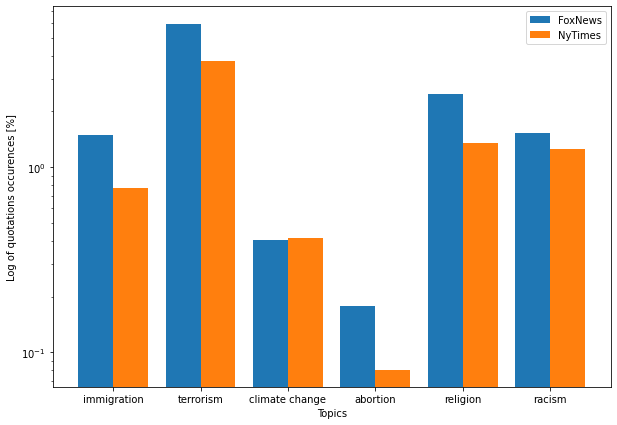

In [8]:
# Bar plot showing the percentage that each topic is quoted by each newspaper 
# for all the years
plt.figure(figsize=(10,7))
x_axis = np.arange(len(lista2))
  
plt.bar(x_axis - 0.2, df_hist['percentage of occurence Fox']*100, 0.4, \
        label = 'FoxNews')
plt.bar(x_axis + 0.2, df_hist['percentage of occurence NyTimes']*100, 0.4, \
        label = 'NyTimes')
  
plt.xticks(x_axis, lista2)
plt.xlabel('Topics')
plt.ylabel("Log of quotations occurences [%]")
plt.yscale('log')
plt.legend()
plt.show()

In [9]:
# Computation of the ttests
count = 0
p_value = pd.DataFrame(columns=lista2)
for l in lista2:
  p_value[lista2[count]] = stats.ttest_ind(df_ttest_fox[lista2[count]],\
                                           df_ttest_ny[lista2[count]])
  count += 1

In [10]:
p_value.loc[1]

immigration       0.000000e+00
terrorism         0.000000e+00
climate change    2.331170e-01
abortion          4.609667e-67
religion          0.000000e+00
racism            8.309947e-51
Name: 1, dtype: float64

# Democrats VS Republicans number of quotes for all years of data

In [ ]:
# Removing the not known speakers
df_foxNy = df_foxNy.drop(df_foxNy[df_foxNy['speaker']=='None'].index)
# Creation of the DataFrame with the 21 most cited speakers
df_cited = df_foxNy['speaker'].value_counts().head(21)
df_cited = df_cited.to_frame(name='number of quotes')
df_cited = df_cited.reset_index()

# Donald Trump is quoted from several different ways, such as President Trump, 
# Donald Trump or Trump. This part of the code puts all those different ways of
# quoting him together as President Donald Trump
df_cited['number of quotes'].loc[0] = df_cited[df_cited['index'].str.contains('Trump')]['number of quotes'].sum()
df_cited = df_cited.drop([1,2])
# The same thing happend with Barack Obama and here all of his quotes are assembled
# as President Barack Obama
df_cited['number of quotes'].loc[7] = df_cited[df_cited['index'].str.contains('Obama')]['number of quotes'].sum()
df_cited = df_cited.drop([20])

In [12]:
# Among the 21 most cited speakers, some are not politicians, such as the Pope
# So here those are removed from the analysis in order to study only the 
# republicans and democrats politicians
df_cited = df_cited.drop([13,16])

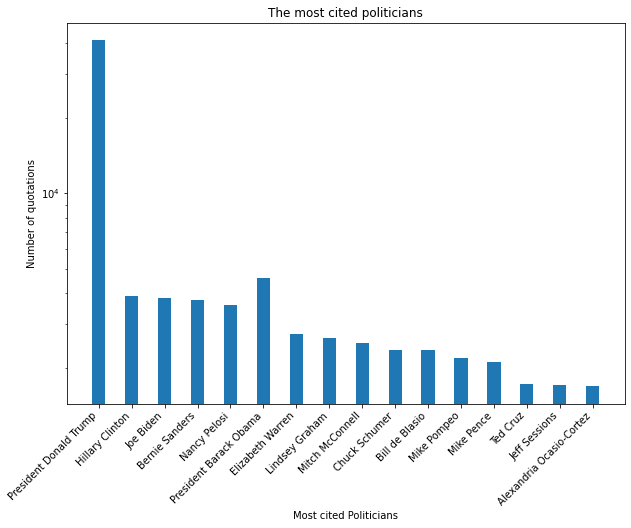

In [13]:
# Plot of the most quoted politicians by both newspapers, 
# in a y-axis logarithmic scale
plt.figure(figsize=(10,7))
x_axis = np.arange(len(df_cited))
  
plt.bar(x_axis, df_cited['number of quotes'], 0.4)
  
plt.xticks(x_axis, df_cited['index'])
plt.xlabel("Most cited Politicians")
plt.ylabel("Number of quotations")
plt.title("The most cited politicians")
plt.yscale('log')
plt.xticks(rotation=45, ha='right')
plt.show()

### Republicans VS Democrats analysis for most cited politicians





In [14]:
# Some very cited Republicans and Democrats are selected here
lista_dem = 'Biden|Obama|Bernie Sanders|Hillary Clinton|Nancy Pelosi|\
Elizabeth Warren|Bill de Blasio'
lista_rep = 'Trump|Lindsey Graham|Mitch Mcconnell|Ted Cruz|Mike Pence|\
Mike Pompeo|Jeff Sessions'

In [15]:
# Number of quotes for those very quoted republicans and democrats 
# per newspapers
count_repFox = len(df_fox[df_fox['speaker'].str.title().str.contains(lista_rep)])
count_demFox = len(df_fox[df_fox['speaker'].str.title().str.contains(lista_dem)])

count_repNy = len(df_ny[df_ny['speaker'].str.title().str.contains(lista_rep)])
count_demNy = len(df_ny[df_ny['speaker'].str.title().str.contains(lista_dem)])

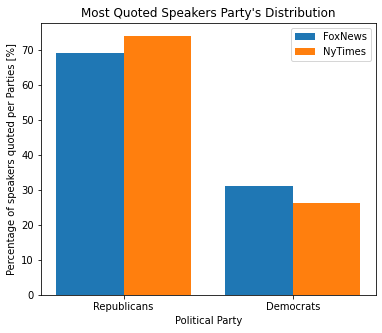

In [17]:
plt.figure(figsize=(6,5))
x = ['Republicans', 'Democrats']
x_axis = np.arange(2)

nb_fox = count_repFox + count_demFox
nb_ny = count_repNy + count_demNy

count_Fox = [count_repFox/nb_fox*100, count_demFox/nb_fox*100]
count_Ny = [count_repNy/nb_ny*100, count_demNy/nb_ny*100]
  
plt.bar(x_axis - 0.2, count_Fox, 0.4, label = 'FoxNews')
plt.bar(x_axis + 0.2, count_Ny, 0.4, label = 'NyTimes')
  
plt.xticks(x_axis, x)
plt.xlabel('Political Party')
plt.ylabel('Percentage of speakers quoted per Parties [%]')
plt.title("Most Quoted Speakers Party's Distribution")
plt.legend()
plt.show()